In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def run(model):
    print(model)

    # Loading Data
    df = pd.read_csv("undersampled_spam.csv", encoding='latin')
    df = df.dropna()

    # Processing Data
    embedder = spacy.load('en_core_web_sm')
    spacy_layer = [embedder(i).vector.reshape(1, -1)[0] for i in df['processedSMS']]

    # Splitting Data
    features, labels = spacy_layer , df['type']
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2022, stratify=labels)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=2022, stratify=y_test)

    # Train Model
    pipeline = Pipeline([('Normalizer', MinMaxScaler()), ('model', model)]).fit(x_train, y_train)

    # Validate Model
    print("Validation Results:")
    y_pred = pipeline.predict(x_val)
    print(classification_report(y_val, y_pred))

    # Test Model
    print("Testing Results:")
    y_pred = pipeline.predict(x_test)
    print(classification_report(y_test, y_pred))

    # More Testing Results
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, zero_division=0)}')
    print(f'Recall: {recall_score(y_test, y_pred, zero_division=0)}')
    rc1, rc2, rc3 = precision_recall_curve(y_test, y_pred)
    print(f'PR_AUC: {auc(rc2,  rc1)}')
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
    plt.axis("off")
    plt.show()

<p style="text-align: center;">ComplementNB</p>

ComplementNB()
Validation Results:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       112
           1       0.83      0.90      0.86       113

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225

Testing Results:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       112
           1       0.82      0.96      0.88       112

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.87       224
weighted avg       0.88      0.88      0.87       224

Accuracy: 0.875
Precision: 0.823076923076923
Recall: 0.9553571428571429
PR_AUC: 0.9003777472527473


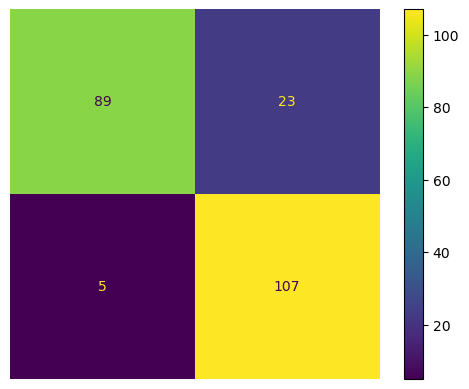

In [3]:
run(ComplementNB())

<p style="text-align: center;">Neural Network</p>

MLPClassifier(max_iter=3000)
Validation Results:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       112
           1       0.89      0.91      0.90       113

    accuracy                           0.90       225
   macro avg       0.90      0.90      0.90       225
weighted avg       0.90      0.90      0.90       225

Testing Results:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       112
           1       0.89      0.91      0.90       112

    accuracy                           0.90       224
   macro avg       0.90      0.90      0.90       224
weighted avg       0.90      0.90      0.90       224

Accuracy: 0.9017857142857143
Precision: 0.8947368421052632
Recall: 0.9107142857142857
PR_AUC: 0.925046992481203


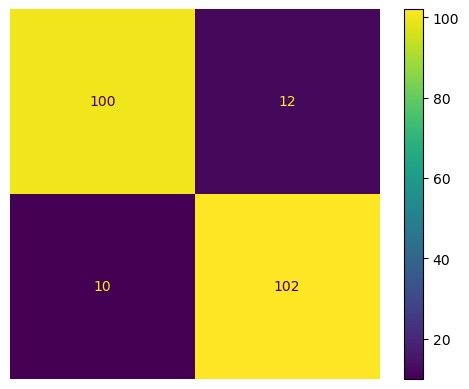

In [4]:
run(MLPClassifier(max_iter=3000))